In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from sklearn.decomposition import KernelPCA
import sys
import numpy
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['figure.figsize']=[12,8]

In [2]:
df = pd.read_excel('Homes for Sale and Real Estate.xlsx')
df

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
0,3704 42 St SW,979999,CA AB T3E 3N1,Glenbrook,4,3.5,1813,Century 21 Bravo Realty
1,30 Mahogany Mews SE #415,439900,CA AB T3M 3H4,Mahogany,2,2.0,1029,Century 21 Bamber Realty Ltd.
2,273 Auburn Shores Way SE,950000,CA AB T3M 2E9,Auburn Bay,4,2.5,2545,Exp Realty
3,235 15 Ave SW #404,280000,CA AB T2R 0P6,Beltline,2,2.0,898,RE/MAX Realty Professionals
4,24 Hemlock Crescent SW #2308,649000,CA AB T3C 2Z1,Spruce Cliff,2,2.0,1482,Charles
...,...,...,...,...,...,...,...,...
3355,203 17 Ave NE,799000,CA AB T2E 1L9,Tuxedo Park,3,2.0,869,RE/MAX Real Estate (Central)
3356,4111 162 Ave SW,8000000,CA AB T2Y 0N7,NaN,5,4.5,9031,Diamond Realty & Associates Ltd.
3357,289 Sage Hill Circle NW,595000,CA AB T3R 1V2,Sage Hill,3,2.5,1733,RE/MAX House Of Real Estate
3358,738 1 Ave SW #1307,7988000,CA AB T2P 5G8,Eau Claire,2,2.5,3544,RE/MAX Real Estate (Central)


In [3]:
df.shape

(3360, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Address      3360 non-null   object 
 1   Price        3360 non-null   int64  
 2   Description  3360 non-null   object 
 3   Place        3344 non-null   object 
 4   Beds         3360 non-null   int64  
 5   Bath         3360 non-null   float64
 6   Sq.Ft        3360 non-null   int64  
 7   Website      3359 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 210.1+ KB


In [5]:
df.isnull().sum()

Address         0
Price           0
Description     0
Place          16
Beds            0
Bath            0
Sq.Ft           0
Website         1
dtype: int64

<Axes: >

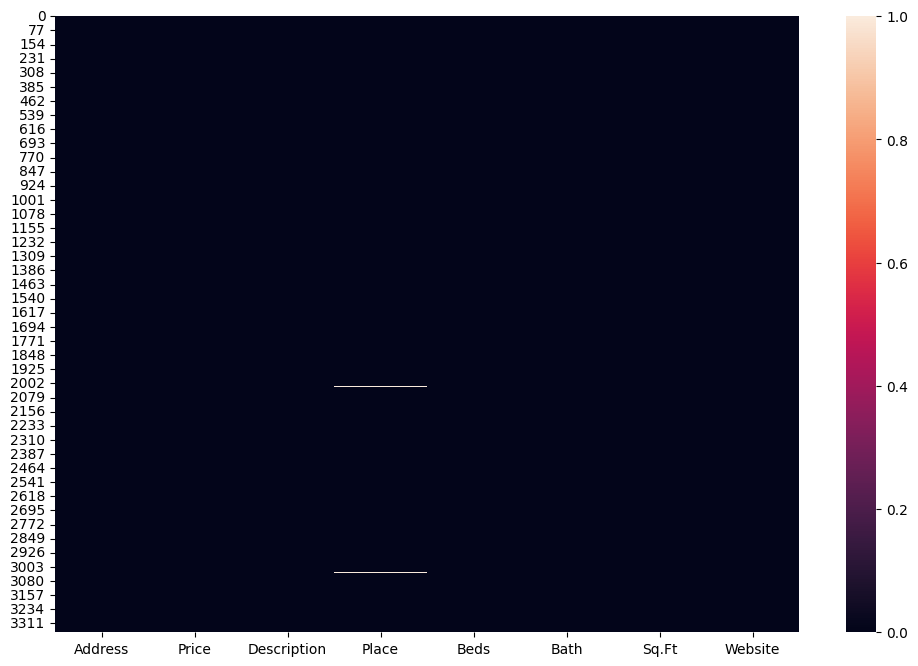

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.Place.replace(to_replace=np.NaN,value=df.Place.mode()[0],inplace=True)
df.Website.replace(to_replace=np.NaN,value=df.Website.mode()[0],inplace=True)

In [8]:
(df.isnull().sum()/len(df))*100

Address        0.0
Price          0.0
Description    0.0
Place          0.0
Beds           0.0
Bath           0.0
Sq.Ft          0.0
Website        0.0
dtype: float64

In [9]:
df.isnull().sum()

Address        0
Price          0
Description    0
Place          0
Beds           0
Bath           0
Sq.Ft          0
Website        0
dtype: int64

<Axes: >

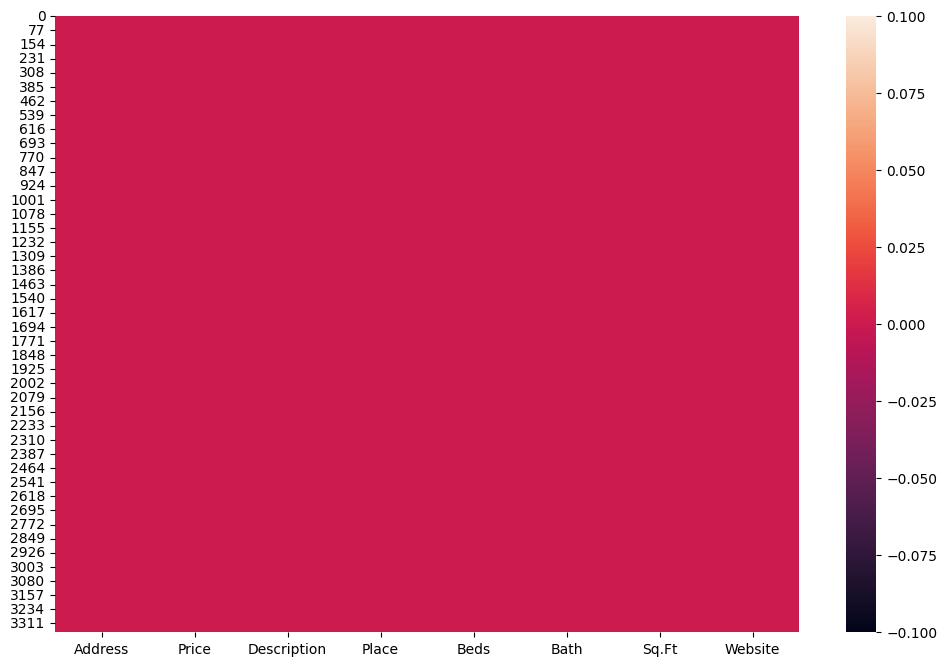

In [10]:
sns.heatmap(df.isnull())

<Axes: >

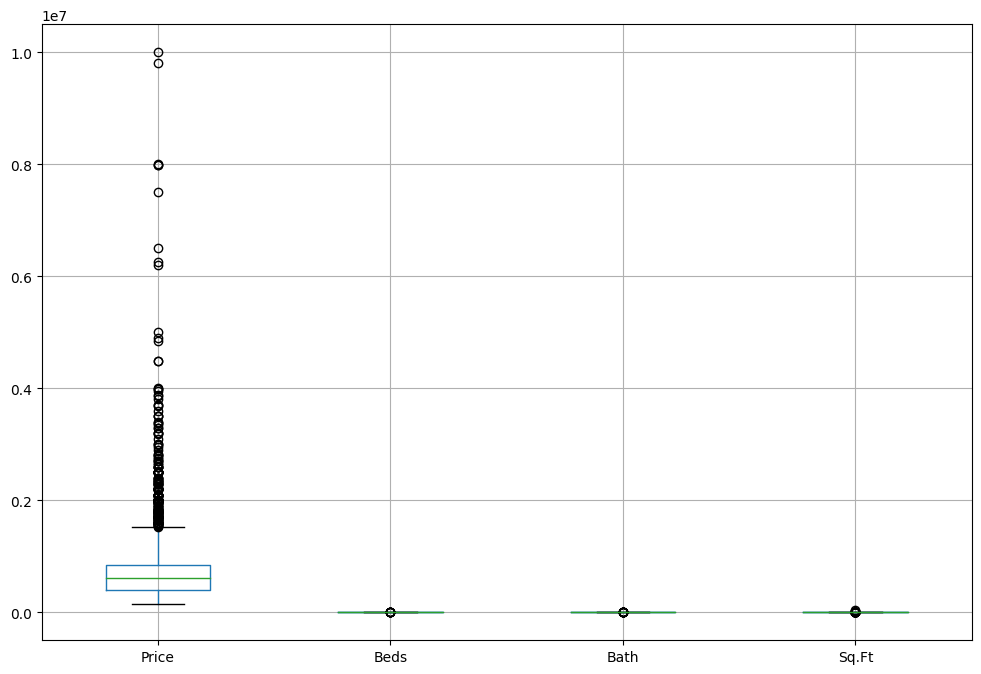

In [11]:
df.boxplot()

In [12]:
numeric_df = df.select_dtypes(include='number')
q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
df = df[~((numeric_df > upper_bound) | (numeric_df < lower_bound)).any(axis=1)]
df.head()


,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
0,3704 42 St SW,979999,CA AB T3E 3N1,Glenbrook,4,3.5,1813,Century 21 Bravo Realty
1,30 Mahogany Mews SE #415,439900,CA AB T3M 3H4,Mahogany,2,2.0,1029,Century 21 Bamber Realty Ltd.
2,273 Auburn Shores Way SE,950000,CA AB T3M 2E9,Auburn Bay,4,2.5,2545,Exp Realty
3,235 15 Ave SW #404,280000,CA AB T2R 0P6,Beltline,2,2.0,898,RE/MAX Realty Professionals
4,24 Hemlock Crescent SW #2308,649000,CA AB T3C 2Z1,Spruce Cliff,2,2.0,1482,Charles


<Axes: >

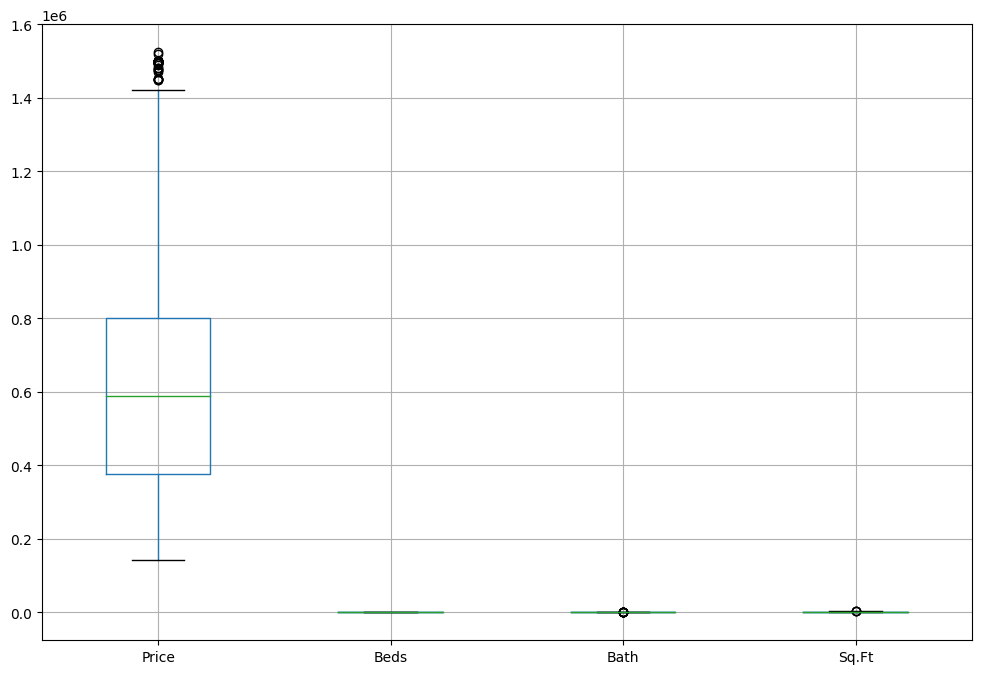

In [13]:
df.boxplot()

In [14]:
df.shape

(3127, 8)

<Axes: ylabel='Price'>

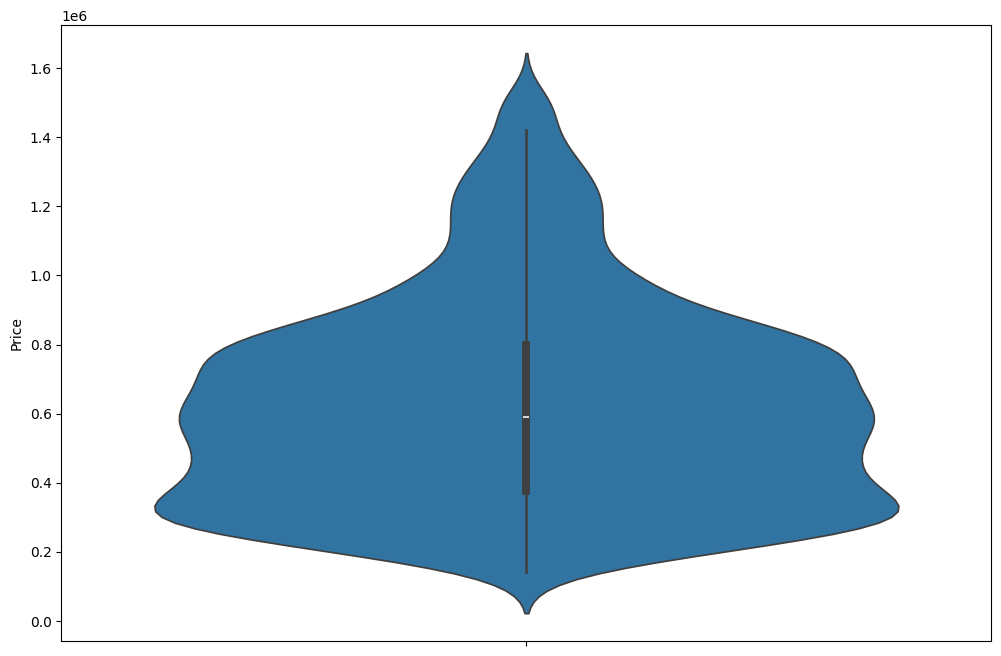

In [15]:
sns.violinplot(y = df.Price)

Text(0, 0.5, 'Availability of Beds')

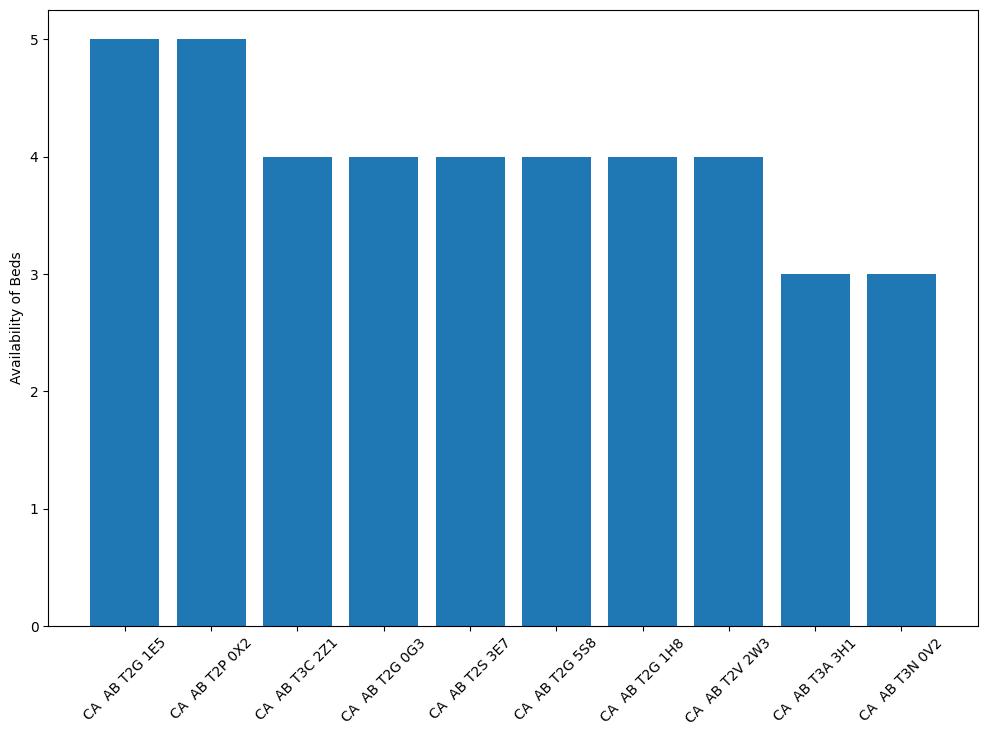

In [16]:
plt.bar(x=df[df['Beds'] == 1].groupby('Description')['Beds'].agg('count').sort_values(ascending=False).head(10).index,height=df[df['Beds'] == 1].groupby('Description')['Beds'].agg('count').sort_values(ascending=False).head(10))
plt.xticks(rotation=45)
plt.ylabel('Availability of Beds')

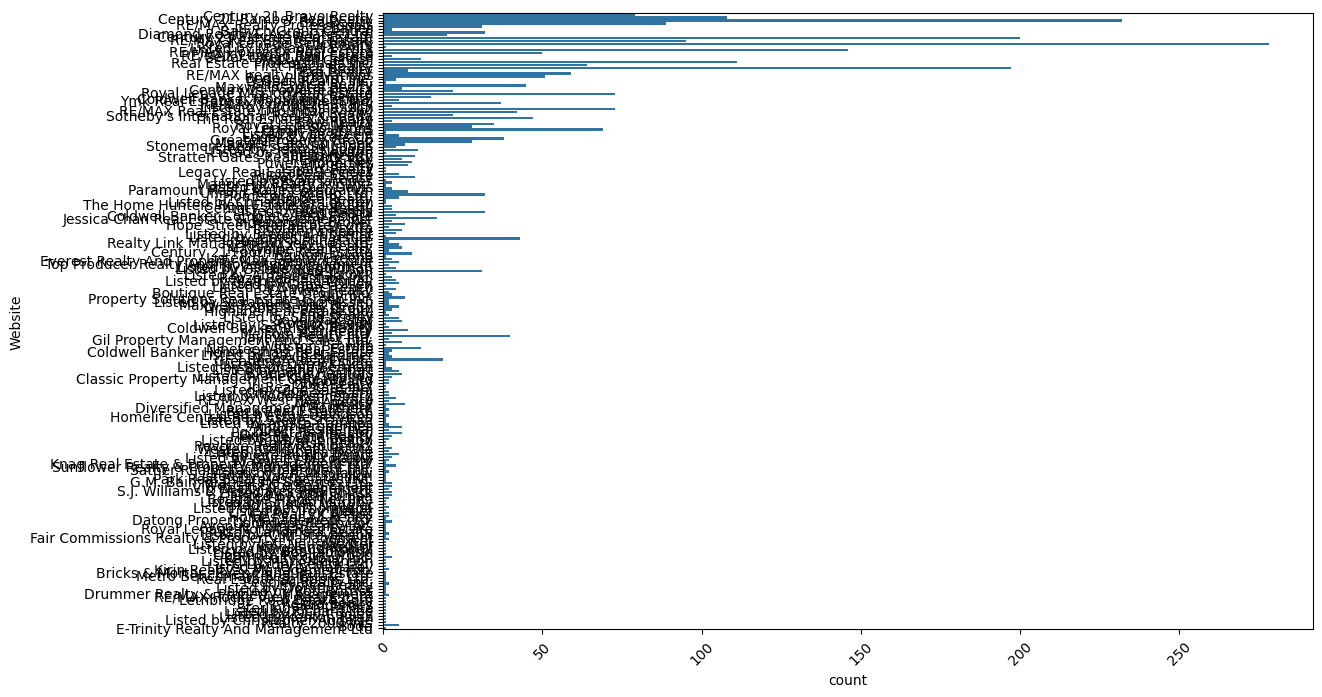

In [17]:
sns.countplot(df.Website)
plt.xticks(rotation = 45)
plt.show()

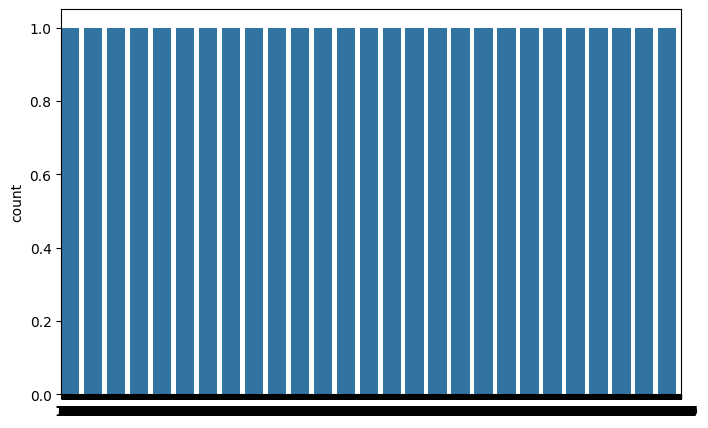

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(df.Beds)
plt.show()

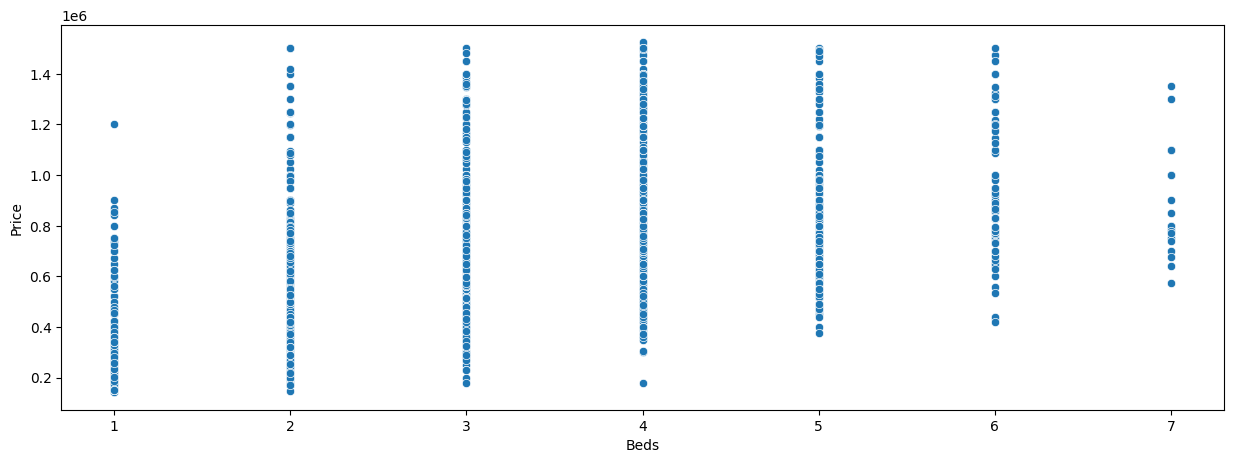

In [19]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="Beds", y="Price", data=df)
plt.show()

Text(0.5, 0, 'Number of Bedrooms')

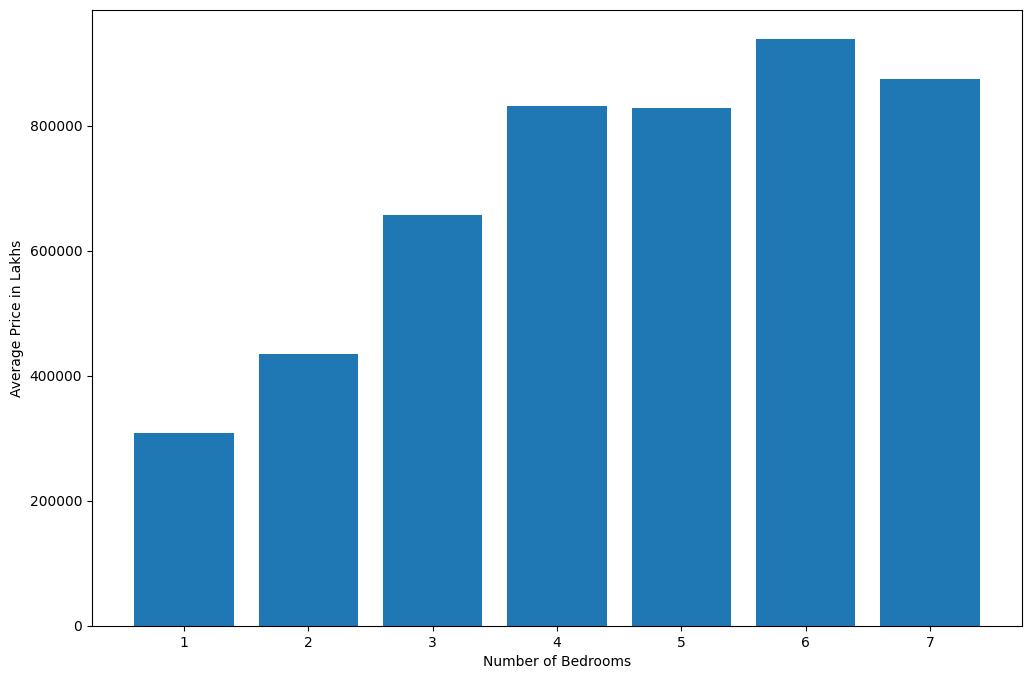

In [20]:
df10 = df.copy()
df10['Beds'] = np.round(df10['Beds'])
plt.bar(x=df10.groupby('Beds')['Price'].agg('mean').sort_values(ascending=False).head(10).index,height=df10.groupby('Beds')['Price'].agg('mean').sort_values(ascending=False).head(10))
plt.ylabel('Average Price in Lakhs')
plt.xlabel('Number of Bedrooms')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Listed by Kenton Ryan'),
  Text(1, 0, 'Realty 2000 Inc.'),
  Text(2, 0, 'Revolve Realty Group Inc.'),
  Text(3, 0, 'Listed by Mariangela Avila'),
  Text(4, 0, 'Evolve Realty'),
  Text(5, 0, 'Bode'),
  Text(6, 0, 'Houston Realty.Ca'),
  Text(7, 0, 'Purpose Realty'),
  Text(8, 0, 'Listed by Kathy Thirsk'),
  Text(9, 0, 'Listed by Sandy Seifert')])

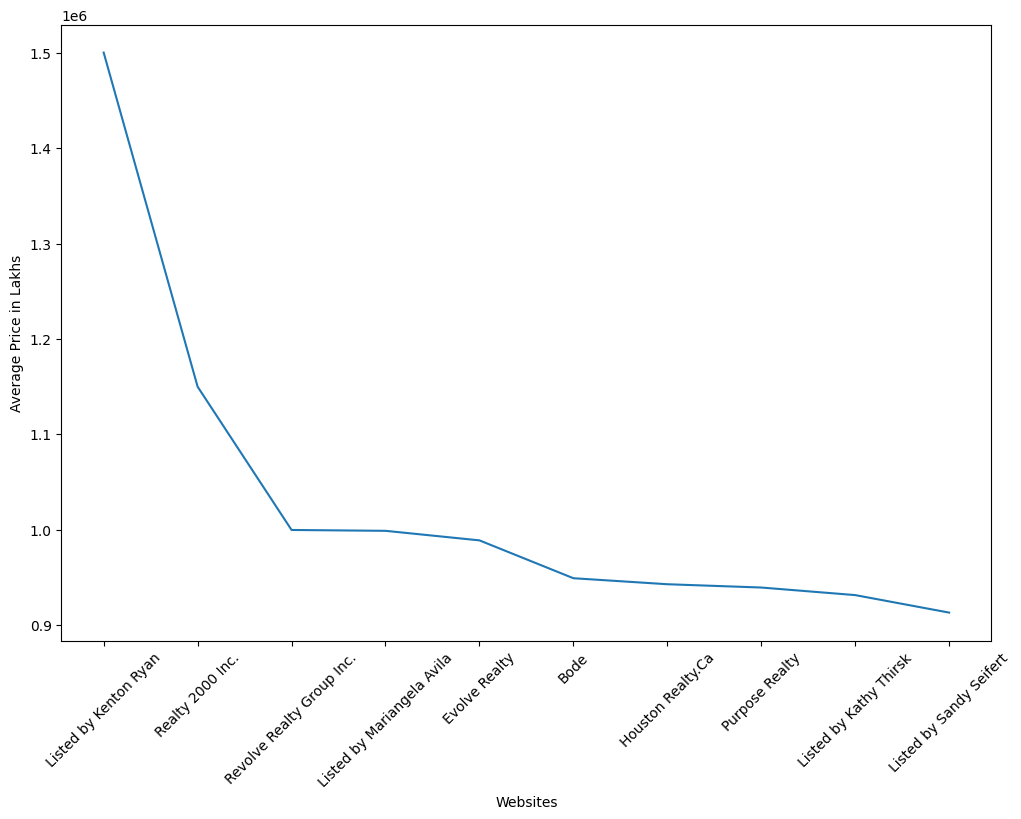

In [21]:
plt.plot(df.groupby(by='Website')['Price'].agg('mean').sort_values(ascending=False).head(10))
plt.xlabel('Websites')
plt.ylabel('Average Price in Lakhs')
plt.xticks(rotation=45)

In [22]:
df['per_sqft'] = df['Price']/df['Sq.Ft']

<ipython-input-22-8a7632a47434>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['per_sqft'] = df['Price']/df['Sq.Ft']


Text(0, 0.5, 'Average Price / Sq.ft in Lakhs')

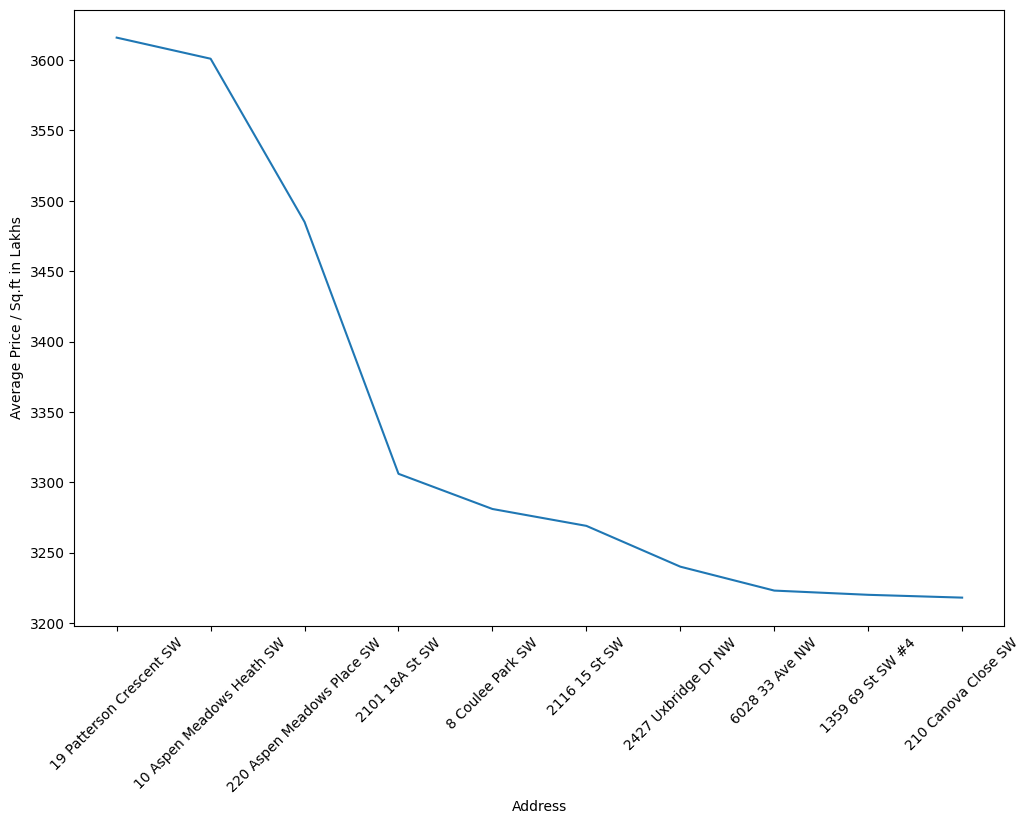

In [23]:
plt.plot(df.groupby(by='Address')['Sq.Ft'].agg('mean').sort_values(ascending=False).head(10))
plt.xticks(rotation = 45)
plt.xlabel('Address')
plt.ylabel('Average Price / Sq.ft in Lakhs')

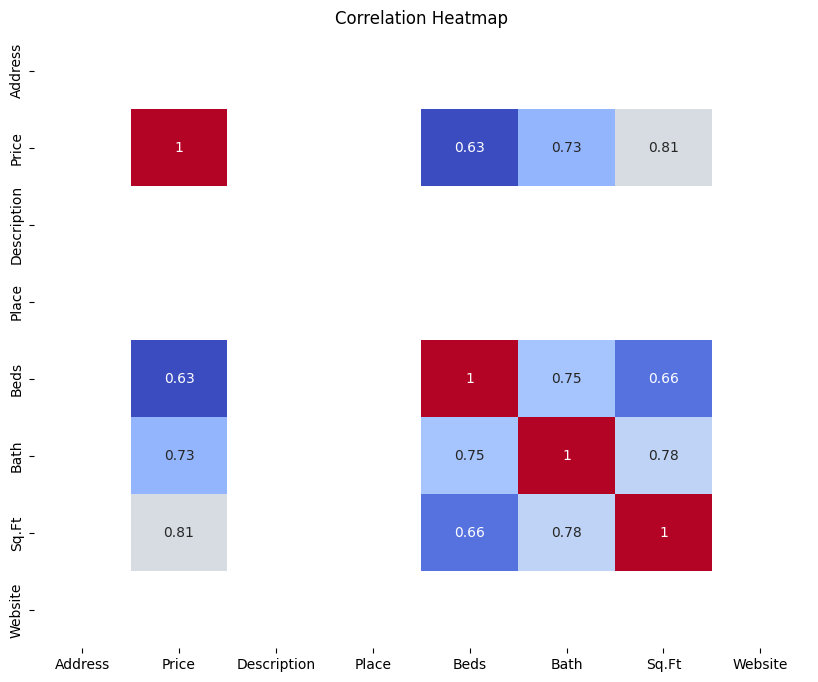

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert string columns to numeric
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Drop columns containing the value 'per_sqft'
df_numeric = df_numeric.drop('per_sqft', axis=1)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation Heatmap')
plt.show()


In [25]:
df.head()

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website,per_sqft
0,3704 42 St SW,979999,CA AB T3E 3N1,Glenbrook,4,3.5,1813,Century 21 Bravo Realty,540.539989
1,30 Mahogany Mews SE #415,439900,CA AB T3M 3H4,Mahogany,2,2.0,1029,Century 21 Bamber Realty Ltd.,427.502430
2,273 Auburn Shores Way SE,950000,CA AB T3M 2E9,Auburn Bay,4,2.5,2545,Exp Realty,373.280943
3,235 15 Ave SW #404,280000,CA AB T2R 0P6,Beltline,2,2.0,898,RE/MAX Realty Professionals,311.804009
4,24 Hemlock Crescent SW #2308,649000,CA AB T3C 2Z1,Spruce Cliff,2,2.0,1482,Charles,437.921727


In [29]:
data_cat=df.select_dtypes(exclude=np.number)
data_num=df.select_dtypes(np.number)
data_cat=data_cat.reset_index()

In [31]:
ss=StandardScaler()
data_num_scaled=pd.DataFrame(ss.fit_transform(data_num),columns=data_num.columns)
data_num_scaled=data_num_scaled.reset_index()
data_num_scaled.head()

,index,Price,Beds,Bath,Sq.Ft,per_sqft
0,0,1.194967,0.751374,1.223647,0.611146,0.650954
1,1,-0.620913,-0.797438,-0.405509,-0.618824,-0.167730
2,2,1.094107,0.751374,0.137543,1.759536,-0.560434
3,3,-1.158517,-0.797438,-0.405509,-0.824342,-1.005685
4,4,0.082107,-0.797438,-0.405509,0.091860,-0.092267


In [32]:
data_scaled=pd.concat([data_num_scaled,data_cat],axis=1).drop('index',axis=1)
data_scaled.head()

,Price,Beds,Bath,Sq.Ft,per_sqft,Address,Description,Place,Website
0,1.194967,0.751374,1.223647,0.611146,0.650954,3704 42 St SW,CA AB T3E 3N1,Glenbrook,Century 21 Bravo Realty
1,-0.620913,-0.797438,-0.405509,-0.618824,-0.167730,30 Mahogany Mews SE #415,CA AB T3M 3H4,Mahogany,Century 21 Bamber Realty Ltd.
2,1.094107,0.751374,0.137543,1.759536,-0.560434,273 Auburn Shores Way SE,CA AB T3M 2E9,Auburn Bay,Exp Realty
3,-1.158517,-0.797438,-0.405509,-0.824342,-1.005685,235 15 Ave SW #404,CA AB T2R 0P6,Beltline,RE/MAX Realty Professionals
4,0.082107,-0.797438,-0.405509,0.091860,-0.092267,24 Hemlock Crescent SW #2308,CA AB T3C 2Z1,Spruce Cliff,Charles


In [33]:
data_encoded_refernce=pd.get_dummies(df,columns=['Address','Place'])
data_encoded_refernce.head()

,Price,Description,Beds,Bath,Sq.Ft,Website,per_sqft,Address_. Lake Fraser Green SE #1313,Address_1 Tuscany Springs Heights NW,Address_10 Aspen Meadows Heath SW,...,Place_Willow Park,Place_Windsor Park,Place_Windsor Park Court,Place_Winston Heights/Mountview,Place_Wolf Willow,Place_Woodbine,Place_Woodlands,Place_Yorke Townhomes,Place_Yorkville,Place_Zen In Aspen
0,979999,CA AB T3E 3N1,4,3.5,1813,Century 21 Bravo Realty,540.539989,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,439900,CA AB T3M 3H4,2,2.0,1029,Century 21 Bamber Realty Ltd.,427.502430,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,950000,CA AB T3M 2E9,4,2.5,2545,Exp Realty,373.280943,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,280000,CA AB T2R 0P6,2,2.0,898,RE/MAX Realty Professionals,311.804009,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,649000,CA AB T3C 2Z1,2,2.0,1482,Charles,437.921727,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
data_encoded_scaled=pd.get_dummies(data_scaled,columns=['Address','Place'])
data_encoded_scaled.head()

,Price,Beds,Bath,Sq.Ft,per_sqft,Description,Website,Address_. Lake Fraser Green SE #1313,Address_1 Tuscany Springs Heights NW,Address_10 Aspen Meadows Heath SW,...,Place_Willow Park,Place_Windsor Park,Place_Windsor Park Court,Place_Winston Heights/Mountview,Place_Wolf Willow,Place_Woodbine,Place_Woodlands,Place_Yorke Townhomes,Place_Yorkville,Place_Zen In Aspen
0,1.194967,0.751374,1.223647,0.611146,0.650954,CA AB T3E 3N1,Century 21 Bravo Realty,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.620913,-0.797438,-0.405509,-0.618824,-0.167730,CA AB T3M 3H4,Century 21 Bamber Realty Ltd.,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.094107,0.751374,0.137543,1.759536,-0.560434,CA AB T3M 2E9,Exp Realty,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-1.158517,-0.797438,-0.405509,-0.824342,-1.005685,CA AB T2R 0P6,RE/MAX Realty Professionals,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.082107,-0.797438,-0.405509,0.091860,-0.092267,CA AB T3C 2Z1,Charles,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Hirearchial Clustering

In [35]:
d1 = data_encoded_scaled.copy()

In [36]:
data_cluster=data_encoded_refernce.copy()

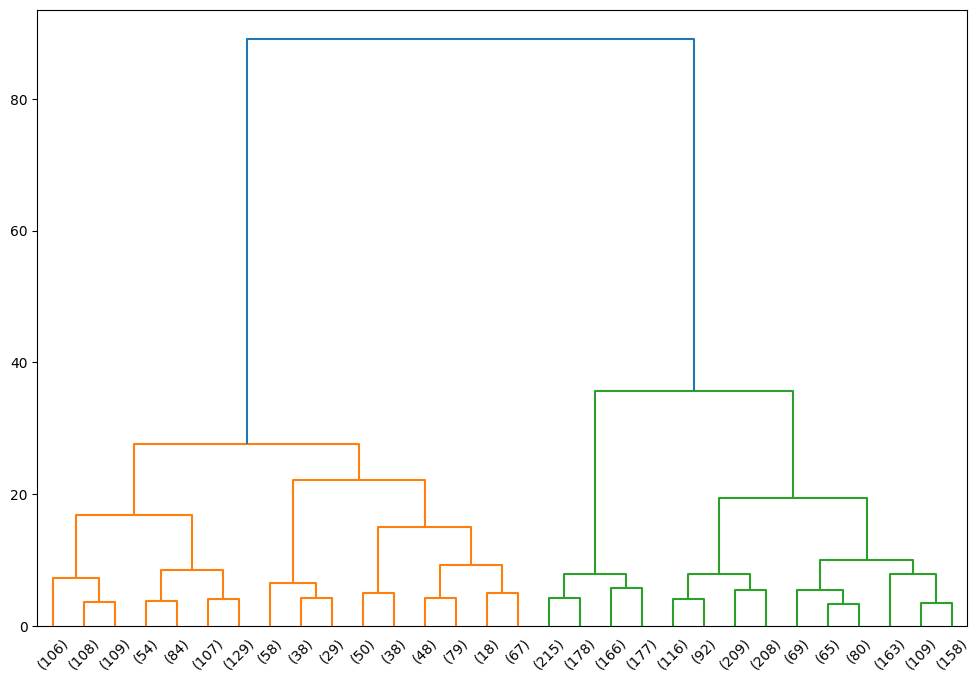

In [37]:
cls=d1[['Sq.Ft','Price']]
mergings=linkage(cls,method='ward',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp')
plt.show()

In [38]:
cluster=cut_tree(mergings,n_clusters=3)

In [39]:
cluster_cut = pd.Series(cut_tree(mergings,n_clusters=3).reshape(-1))
cluster_cut.value_counts()

1    1269
0    1122
2     736
Name: count, dtype: int64

<Axes: xlabel='Sq.Ft', ylabel='Price'>

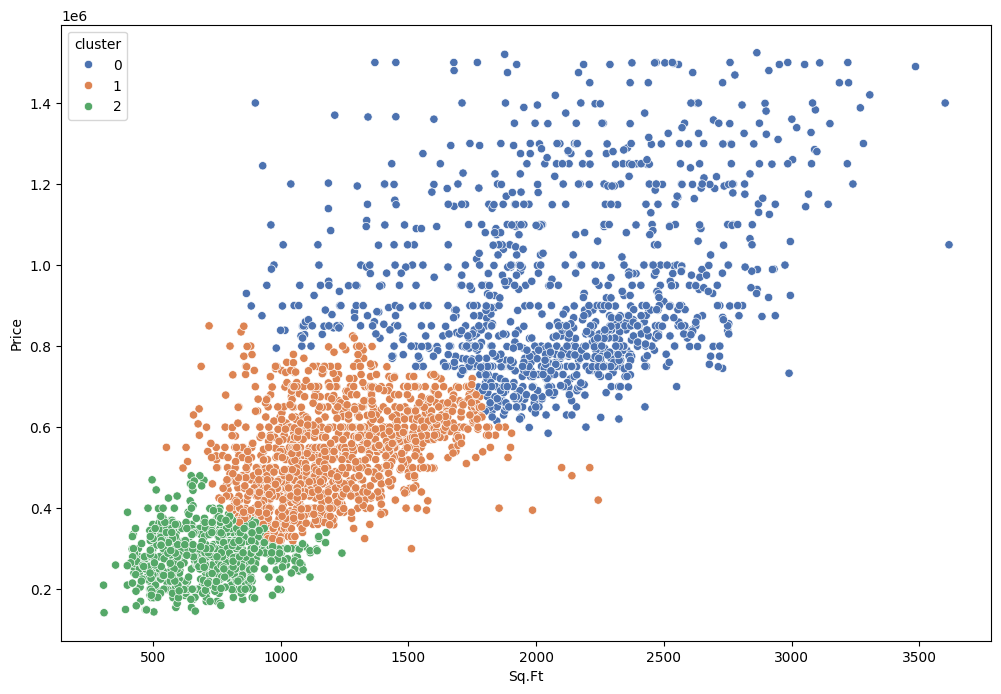

In [40]:
d1['cluster']=cluster
data_cluster['cluster']=cluster
sns.scatterplot(y=df.Price,x=df['Sq.Ft'],hue=data_cluster['cluster'],palette='deep')

K-Means Clustering

In [41]:
ssd = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls)
    ssd.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

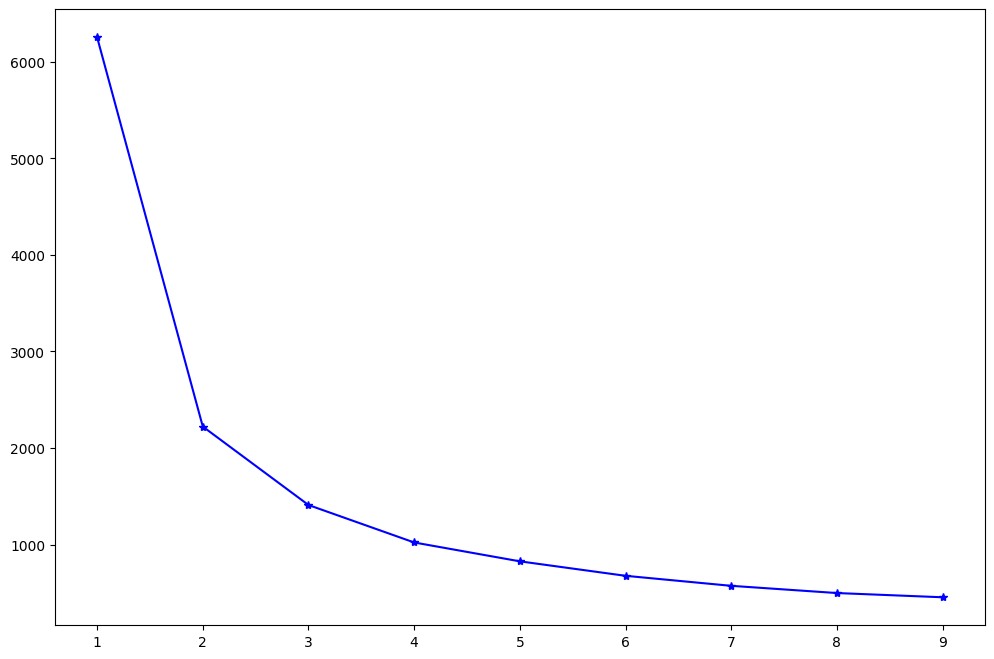

In [42]:
plt.plot(range(1,10),ssd,marker='*',color='b')

In [43]:
from sklearn.metrics import silhouette_score

score = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=4)
    kmeans.fit(cls)
    labels = kmeans.labels_
    ss = silhouette_score(cls, labels)  # Use cls instead of d1 for silhouette_score
    score.append(ss)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 0, 'no of clusters')

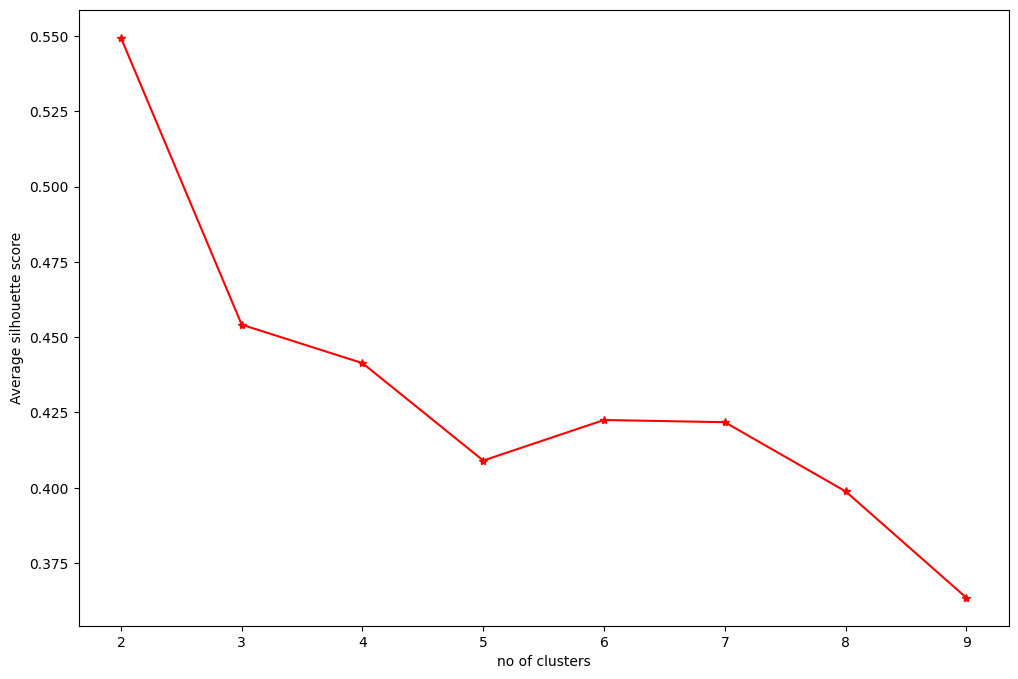

In [44]:
plt.plot(range(2,10),score,marker='*',color='r')
plt.ylabel('Average silhouette score')
plt.xlabel('no of clusters')

In [45]:
def svisualizer(x, ncluster):
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    import numpy as np
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    km = KMeans(n_clusters=ncluster, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(x)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0

    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")

    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')

    plt.tight_layout()
    plt.show()

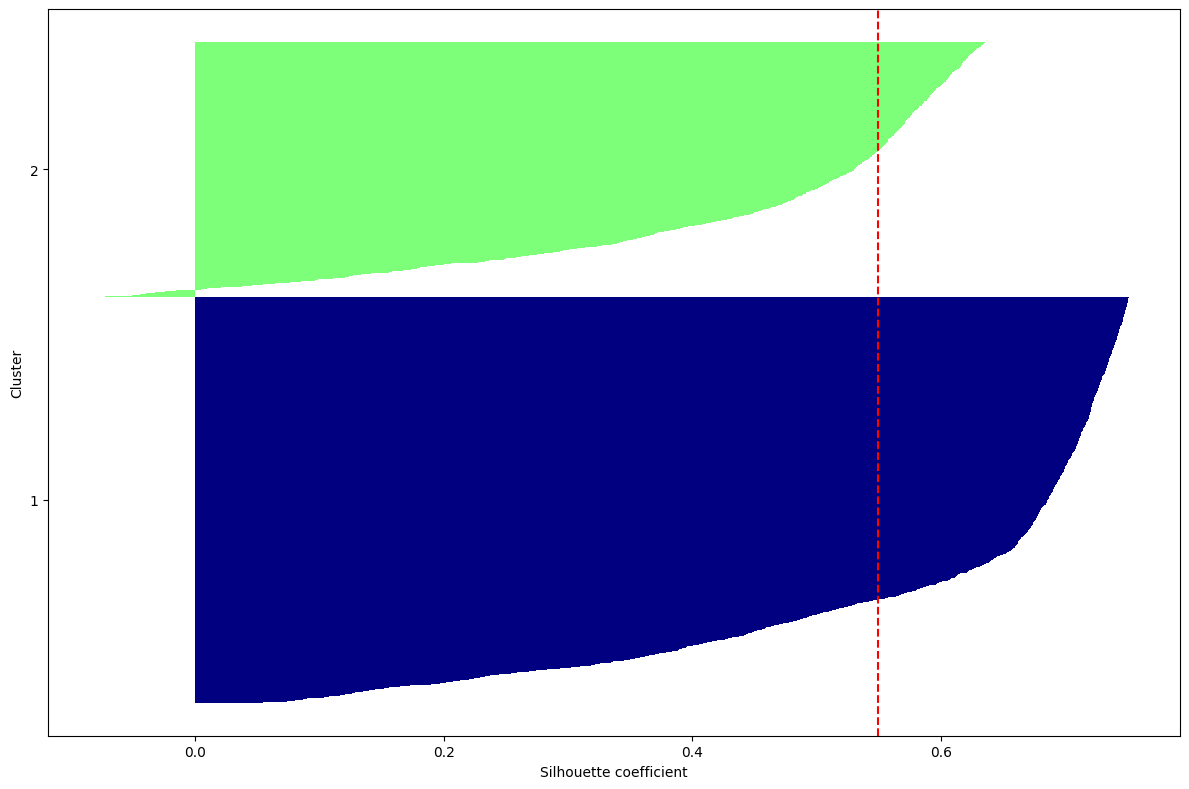

In [46]:
svisualizer(cls,2)

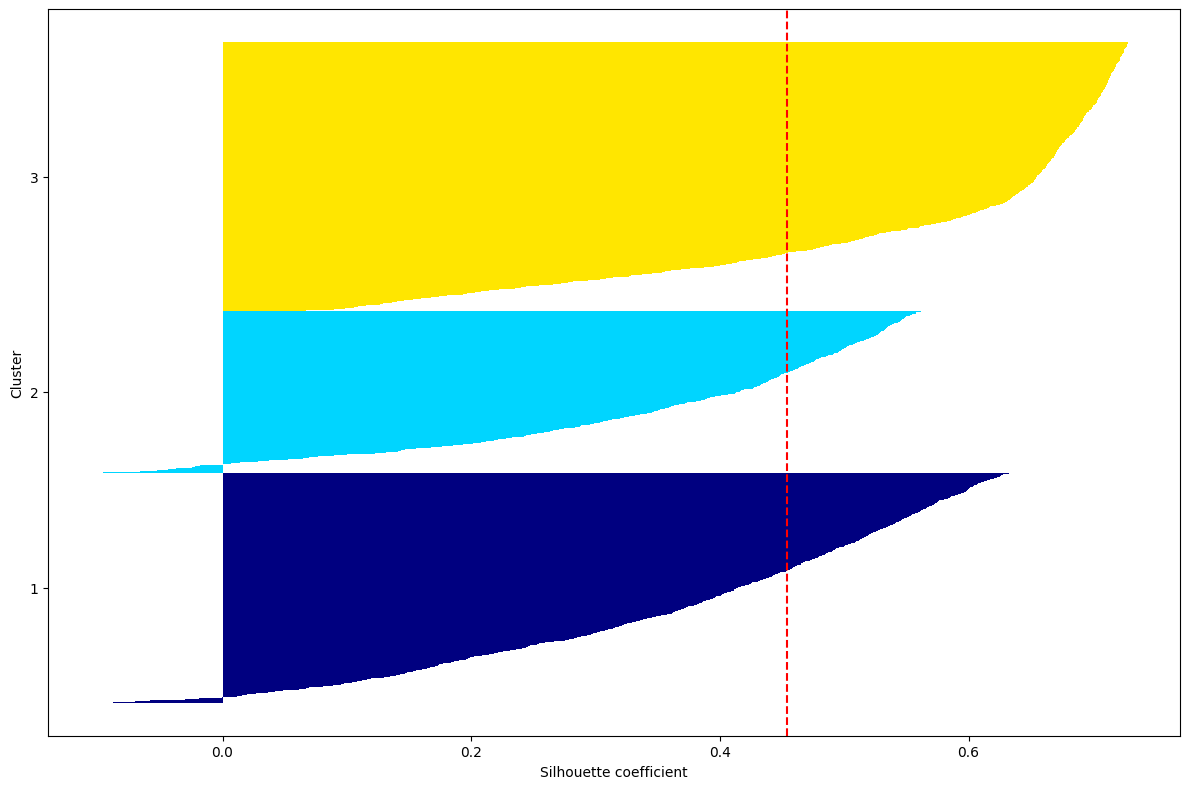

In [47]:
svisualizer(cls,3)

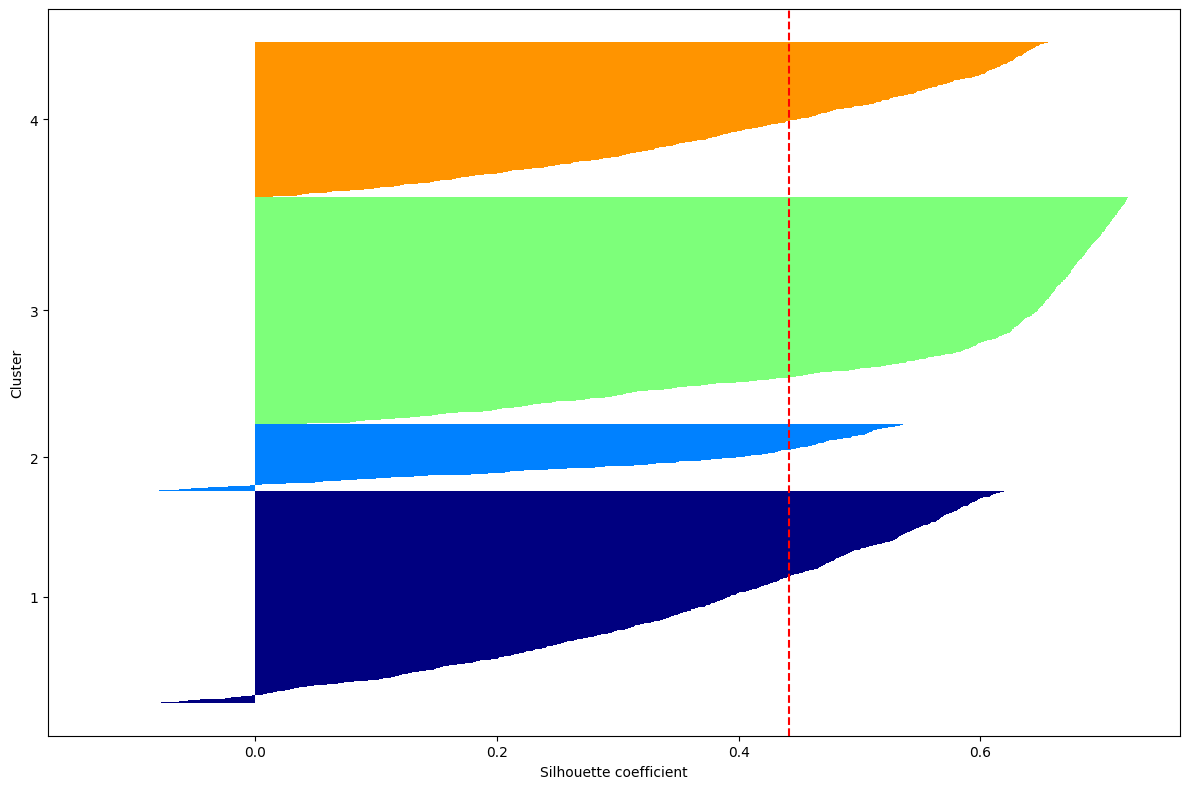

In [48]:
svisualizer(cls,4)

In [49]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import LabelEncoder

# # Encode categorical variables
# label_encoders = {}
# data_encoded = data_encoded_refernce.copy()
# for col in data_encoded.columns:
#     if data_encoded[col].dtype == 'object':
#         label_encoders[col] = LabelEncoder()
#         data_encoded[col] = label_encoders[col].fit_transform(data_encoded[col])
# model = KMeans(n_clusters=3, random_state=10)
# cluster_kmeans = model.fit_predict(data_encoded)

# # Assign cluster labels to the DataFrame
# data_cluster = data_encoded_refernce.copy()
# data_cluster['kmeans_cluster'] = cluster_kmeans
# print(data_cluster.head())

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
data_encoded = data_encoded_refernce.copy()
for col in data_encoded.columns:
    if data_encoded[col].dtype == 'object':
        label_encoders[col] = LabelEncoder()
        data_encoded[col] = label_encoders[col].fit_transform(data_encoded[col])

# Apply KMeans clustering
model = KMeans(n_clusters=3, random_state=10)
cluster_kmeans = model.fit_predict(data_encoded)

# Assign cluster labels to the DataFrame
data_cluster = data_encoded_refernce.copy()
data_cluster['kmeans_cluster'] = cluster_kmeans
print(data_cluster.head())

# Select columns of interest
df3 = data_cluster.iloc[:, [0, 1, 2, 3, 4, 5, 1119]]
print(df3.head())



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    Price     Description  Beds  Bath  Sq.Ft                        Website  \
0  979999  CA  AB T3E 3N1     4   3.5   1813        Century 21 Bravo Realty   
1  439900  CA  AB T3M 3H4     2   2.0   1029  Century 21 Bamber Realty Ltd.   
2  950000  CA  AB T3M 2E9     4   2.5   2545                     Exp Realty   
3  280000  CA  AB T2R 0P6     2   2.0    898    RE/MAX Realty Professionals   
4  649000  CA  AB T3C 2Z1     2   2.0   1482                        Charles   

     per_sqft  Address_. Lake Fraser Green SE #1313  \
0  540.539989                                 False   
1  427.502430                                 False   
2  373.280943                                 False   
3  311.804009                                 False   
4  437.921727                                 False   

   Address_1 Tuscany Springs Heights NW  Address_10 Aspen Meadows Heath SW  \
0                                 False                              False   
1                                 Fals

In [50]:
print(df3.columns)

Index(['Price', 'Description', 'Beds', 'Bath', 'Sq.Ft', 'Website',
       'Address_211 13 Ave SE #1704'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


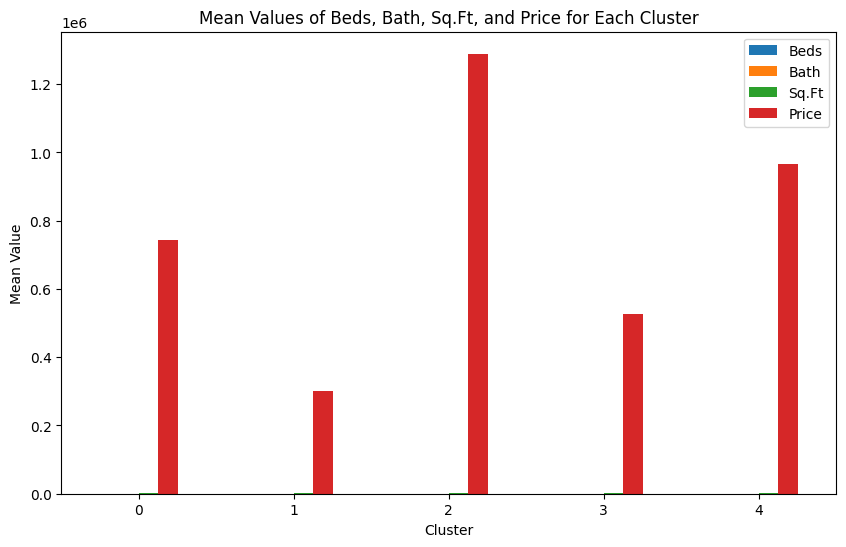

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Let's assume you have loaded your data into a DataFrame called 'data_cluster'

# Assuming you already have your data loaded into a DataFrame called 'data_cluster'
df3 = data_cluster[['Beds', 'Bath', 'Sq.Ft', 'Price']]  # Selecting relevant columns

# Now, let's perform some basic clustering analysis
from sklearn.cluster import KMeans

# Let's assume you want to cluster based on the number of bedrooms, bathrooms, square footage, and price
X = df3.values

# Assume you want to find 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
data_cluster['kmeans_cluster'] = kmeans.fit_predict(X)

# Now, let's group by the clusters and calculate the mean values
df4 = data_cluster.groupby(by='kmeans_cluster')[['Beds', 'Bath', 'Sq.Ft', 'Price']].mean()

# Plotting
df4.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.title('Mean Values of Beds, Bath, Sq.Ft, and Price for Each Cluster')
plt.xticks(rotation=0)
plt.show()


In [55]:
def cluster_plot(data, nclusters):
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    X = data.copy()
    cols = list(X.columns)
    km = KMeans(n_clusters=nclusters, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(X)


    # Visualize it:
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=km.labels_.astype(float))

    # plot the centroids
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')
    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

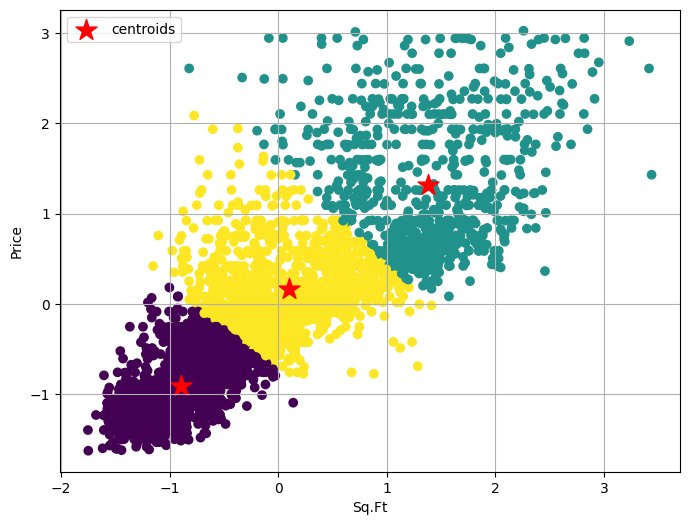

In [56]:
cluster_plot(cls,3)

In [57]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.25,min_samples=4)

dbscan.fit(cls)

pd.Series(dbscan.labels_).value_counts()

 0    3104
-1      17
 1       6
Name: count, dtype: int64

In [58]:
lbl = pd.Series(dbscan.labels_)
lbl.loc[lbl >= 0] = 0
lbl.value_counts()

 0    3110
-1      17
Name: count, dtype: int64

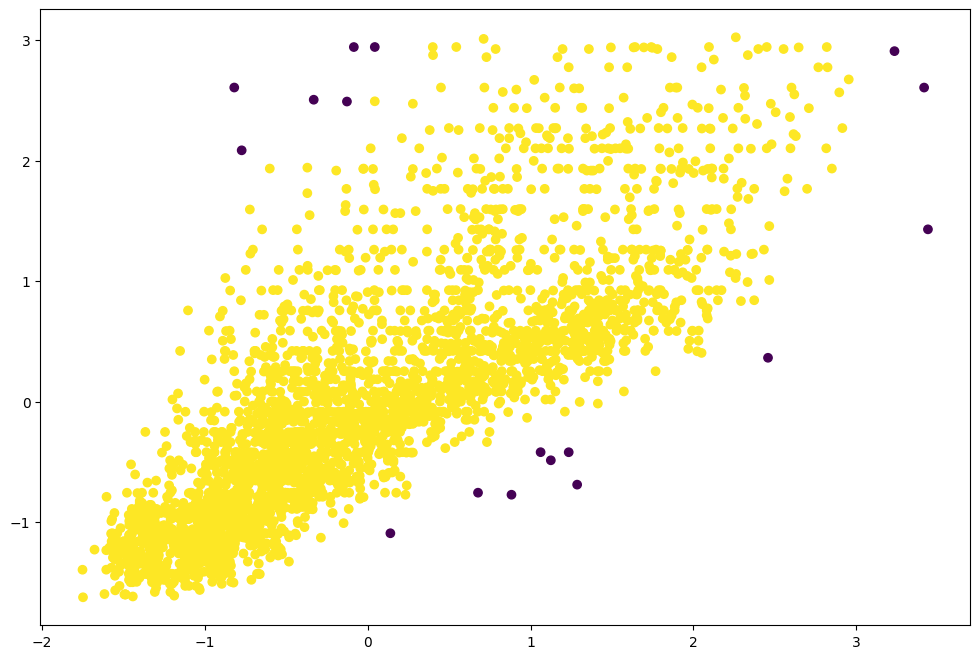

In [59]:
plt.scatter(cls['Sq.Ft'],cls['Price'],c=lbl)

PCA

In [60]:
from sklearn.decomposition import PCA
d2 = data_num_scaled.drop(['index'],axis=1)
d2.head()

,Price,Beds,Bath,Sq.Ft,per_sqft
0,1.194967,0.751374,1.223647,0.611146,0.650954
1,-0.620913,-0.797438,-0.405509,-0.618824,-0.167730
2,1.094107,0.751374,0.137543,1.759536,-0.560434
3,-1.158517,-0.797438,-0.405509,-0.824342,-1.005685
4,0.082107,-0.797438,-0.405509,0.091860,-0.092267


In [61]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(d2)

print(np.cumsum(pca.explained_variance_ratio_*100))

[ 63.6877923   87.10912367  95.26302164  99.47551911 100.        ]


In [62]:
pca=PCA(n_components=2)
pca.fit_transform(d2)

print(pca.explained_variance_ratio_*100)

[63.6877923  23.42133137]


In [63]:
components = pca.components_.T
pd.DataFrame(components,index=d2.columns,columns=['PC1','PC2'])

,PC1,PC2
Price,0.503190,0.298596
Beds,0.475034,-0.051593
Bath,0.511186,-0.091854
Sq.Ft,0.507607,-0.239382
per_sqft,0.046548,0.917844


In [64]:
data_pca=pd.DataFrame(pca.transform(d2),columns=['PC1','PC2'])
data_pca

,PC1,PC2
0,1.924257,0.656827
1,-1.220465,-0.112827
2,1.844848,-0.660295
3,-1.634309,-0.993269
4,-0.502451,-0.003770
...,...,...
3122,-1.591652,-0.462354
3123,-0.704062,-0.855653
3124,-0.206641,3.538050
3125,0.219659,-0.870850


In [65]:
model=KMeans(n_clusters=3,random_state=10)
cluster_kmeans=model.fit_predict(data_pca)
data_pca['km_cluster_pca']=cluster_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

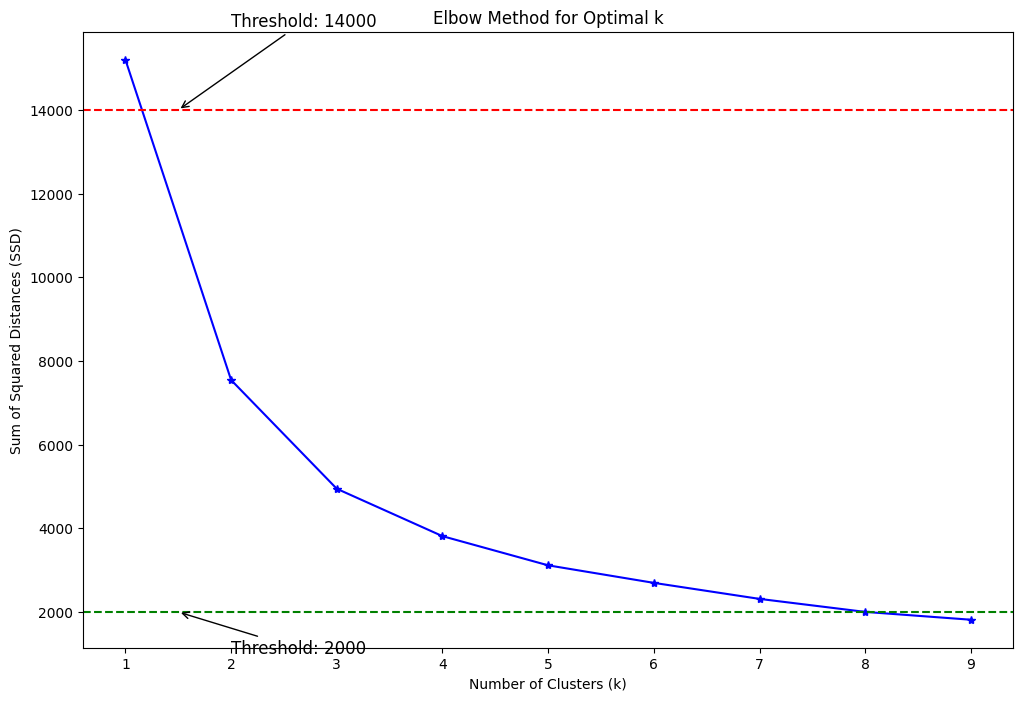

In [67]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ssd = []

# Assuming 'data_pca' contains your data after PCA transformation
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=4)
    kmeans.fit(data_pca)
    ssd.append(kmeans.inertia_)

plt.plot(range(1, 10), ssd, marker='*', color='b')
plt.axhline(14000, color='r', linestyle='--')  # Adjusting the threshold to 14000
plt.axhline(2000, color='g', linestyle='--')  # Adjusting the threshold to 2000

# Annotate the thresholds
plt.annotate('Threshold: 14000', xy=(1.5, 14000), xytext=(2, 16000),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
plt.annotate('Threshold: 2000', xy=(1.5, 2000), xytext=(2, 1000),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method for Optimal k')
plt.show()


<Axes: xlabel='PC1', ylabel='PC2'>

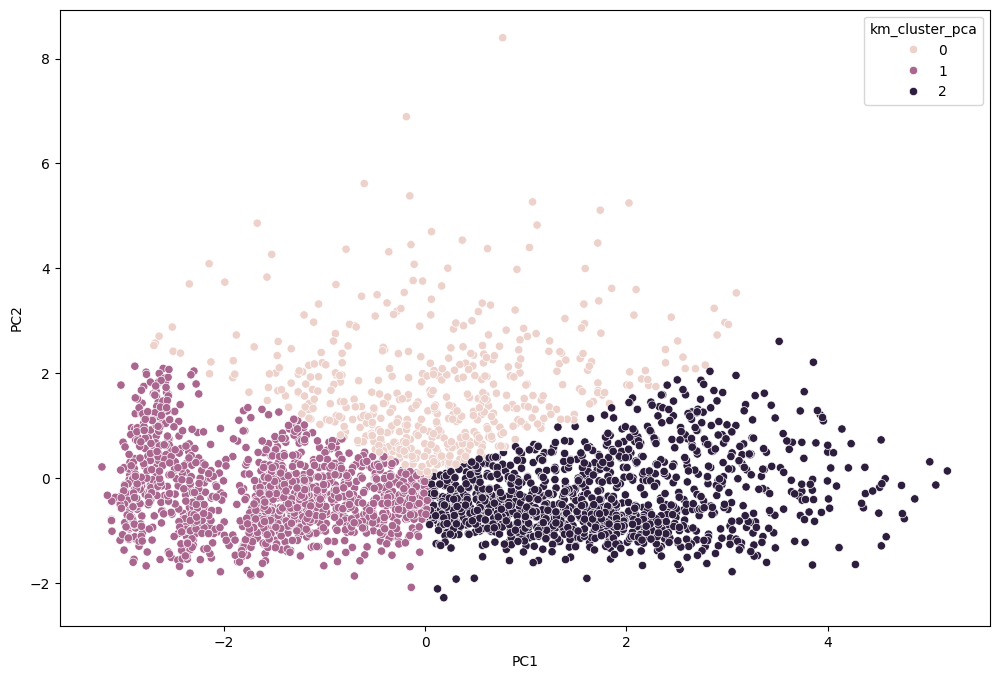

In [68]:
sns.scatterplot(x=data_pca['PC1'],y=data_pca['PC2'],hue=data_pca['km_cluster_pca'])

Content Based Filter

In [69]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Remove non-numeric columns if not needed
data_numeric = data_encoded_scaled.drop(columns=['Description', 'Website'])

# Initialize a NearestNeighbors model
model = NearestNeighbors(metric='cosine')

# Fit the model
model.fit(data_numeric)


NearestNeighbors(metric='cosine')

In [70]:
selected=7
data_encoded_scaled.iloc[selected].values[0:8]

array([-0.41918579949911067, 0.7513743642060781, -0.40550880801527656,
       -0.45566458194948395, -0.06839384052959431, 'CA  AB T2W 0N8',
       'Century 21 Elevate Real Estate', False], dtype=object)

In [71]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Select numeric columns
numeric_columns = ['Price', 'Beds', 'Bath', 'Sq.Ft']

# Encode categorical variables
label_encoders = {}
for col in data_encoded_scaled.columns:
    if col not in numeric_columns:
        label_encoders[col] = LabelEncoder()
        data_encoded_scaled[col] = label_encoders[col].fit_transform(data_encoded_scaled[col])

# Scale numeric features
scaler = StandardScaler()
data_encoded_scaled[numeric_columns] = scaler.fit_transform(data_encoded_scaled[numeric_columns])

# Use NearestNeighbors
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric='cosine')
model.fit(data_encoded_scaled)

# Now you can use the model
dist, index = model.kneighbors(data_encoded_scaled.iloc[selected].values.reshape(1, -1), n_neighbors=6)
index


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


array([[   7,  965,  656,  217, 1060, 1474]])

In [72]:
suggest=[]
for x in index:
    suggest.append(x)
suggest

[array([   7,  965,  656,  217, 1060, 1474])]

In [73]:
data_encoded_refernce = data_encoded_refernce.reset_index()
data_encoded_refernce = data_encoded_refernce.drop('index',axis=1)

In [74]:
# Select the row at index 'selected' and ensure it's numeric
selected_row = data_encoded_refernce.iloc[[selected]]
numeric_row = selected_row.apply(pd.to_numeric, errors='coerce')

# Drop columns where the values are less than or equal to zero
r = numeric_row.loc[:, (numeric_row > 0).any()]

print(r)


    Price  Beds  Bath  Sq.Ft    per_sqft  \
7  499900     4   2.0   1133  441.218005   

   Address_10551 Shillington Crescent SW  Place_Southwood  
7                                   True             True  
